数据来源：某企业6种商品对应的送货及用户反馈数据
解决问题：
1、配送服务是否存在问题--时间长？拒收问题？
2、是否存在尚有潜力的销售区域--华东？华南？
3、商品是否存在质量问题

结论：
1、货品4->西北，货品2->马来西亚 两条线路存在较大问题，急需提升
2、货品2->华东市场较大市场空间，适合大投入；货品2在西北配送时效长，用户拒收率高，应该减少投入
3、货品1、2、4质量存在问题，建议扩大抽检范围，增大质检力度

过程：
1、数据清洗
    重复值、缺失值、格式调整
    异常值处理（比如：销售金额存在等于0的，数量和销售金额的标准差都在均值的8倍以上等）
2、数据规整
比如：增加一项辅助列：月份
3、数据可视化

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'##设置中文显示

In [3]:
# 1、数据清洗
#     重复值、缺失值、格式调整
#     异常值处理（比如：销售金额存在等于0的，属于异常等）
data = pd.read_csv("C:\\Users\\Administrator\\Desktop\\data_wuliu.csv",encoding = 'gbk')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1159 non-null   object 
 1   订单行     1161 non-null   int64  
 2   销售时间    1161 non-null   object 
 3   交货时间    1161 non-null   object 
 4   货品交货状况  1159 non-null   object 
 5   货品      1161 non-null   object 
 6   货品用户反馈  1161 non-null   object 
 7   销售区域    1161 non-null   object 
 8   数量      1157 non-null   float64
 9   销售金额    1161 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 90.8+ KB


通过info()可以看出，包括10列数据，名字，数据量，格式等，可以得出：\n
1、订单号，货品交货情况，数量：存在缺失值，但是量不大，可以删除\n
2、订单行，对分析无关紧要，可以考虑删除\n
3、销售金额格式不对（万元|元，逗号问题），数据类型需要转换成int|float\n

In [5]:

data.drop_duplicates(keep='first',inplace=True)
#drop_duplicates() 是 Pandas 中用于删除重复行的重要方法
# 参数                     说明	            默认值
# subset	   指定判断重复的列名/列名列表	None (所有列)
# keep	       保留策略：
#             'first' - 保留第一个出现的
#             'last' - 保留最后一个出现的
#              False - 删除所有重复项	    'first'
# inplace	   是否修改原对象
#              True - 直接修改原DataFrame
#              False - 返回新DataFrame	    False
# ignore_index	是否重置索引
#              True - 新索引从0开始
#              False - 保留原索引	        False

#删除缺失值（删除带有na的整行数据）
data.dropna(axis=0,how='any',inplace=True)
#删除包含缺失值（NaN）的行的常用方法
# 参数详解
# 1. axis (操作轴)
#    axis=0 或 'index' (默认)：删除包含缺失值的行
#    axis=1 或 'columns'：删除包含缺失值的列
# 2. how (删除条件)
#    'any' (默认)：行/列中任意一个值为缺失值就删除
#    'all'：仅当行/列中所有值都为缺失值时才删除
# 3. thresh (阈值)
#    指定保留行/列所需的非缺失值最小数量
#    例如：thresh=3 表示保留至少有 3 个非缺失值的行/列
# 4. subset (子集)
#    指定要检查缺失值的特定列（当 axis=0）或特定行（当 axis=1）
#    例如：subset=['age', 'income'] 只检查这两列是否有缺失
# 5. inplace (是否原地修改)
#    False (默认)：返回新对象，原数据不变
#    True：直接修改原对象，不返回新对象
# 6. ignore_index (索引处理)
#    True：重置索引（0, 1, 2...）
#    False (默认)：保留原索引

#删除订单列
data.drop(columns=['订单行'],inplace=True,axis=1)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1146 entries, 0 to 1160
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1146 non-null   object 
 1   销售时间    1146 non-null   object 
 2   交货时间    1146 non-null   object 
 3   货品交货状况  1146 non-null   object 
 4   货品      1146 non-null   object 
 5   货品用户反馈  1146 non-null   object 
 6   销售区域    1146 non-null   object 
 7   数量      1146 non-null   float64
 8   销售金额    1146 non-null   object 
dtypes: float64(1), object(8)
memory usage: 89.5+ KB
None


In [6]:
#更新索引
data.reset_index(drop=True,inplace=True)
#reset_index() 是 Pandas 中用于重置索引的核心方法
#DataFrame.reset_index(
#     level=None,           # 要重置的索引级别（多级索引时）
#     drop=False,           # 是否丢弃原索引（不保存为列）
#     inplace=False,        # 是否直接修改原对象
#     col_level=0,          # 多级列名时的插入级别
#     col_fill='',          # 其他列级别的填充名称
#     allow_duplicates=False, # 是否允许重复列名
#     names=None            # 新列的名称（多级索引时）
# )
# 核心参数详解
# 1. drop (丢弃索引)
# False (默认)：将原索引转换为新列
# True：直接丢弃原索引，不保存为列
# 2. inplace (就地修改)
# False (默认)：返回新对象，原数据不变
# True：直接修改原对象，不返回新对象
# 3. level (多级索引处理)
# 指定要重置的索引级别（用于多级索引）
# 可以是级别名称、位置或列表


In [18]:
#取出销售金额列，对每一个数据进行清洗
#编写自定义过滤函数：删除逗号，转成float，如果是万元则*10000，否则删除元
def data_deal(number):
    if number.find('万元') != -1:#找到带有万元，取出数字，去掉逗号，转成float，*10000
    ###注意！！只用object才能用find
        number_new = float(number[:number.find('万元')].replace(',',''))*10000
    else:#找到带有元的，删除元，删除逗号，转成float
        number_new = float(number.replace('元','').replace(',',''))
    return number_new
data['销售金额'] = data['销售金额'].map(data_deal)

In [20]:
#异常值处理（比如：
#   销售金额存在等于0的
#   数量和销售金额的标准差都在均值的8倍以上等）
data

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0
2,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0
...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,20041.0
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,7944.0
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,19408.0
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,3218.0


In [25]:
data.describe()
#数量：50％还是1，但均值为76，且标准为589，说明有相差很大的数，严重右偏现象，
#销售金额：均值与50％差了10^2，说明跟数量一样也是右偏严重
#中位数>均值-左偏
#中位数<均值-右偏

,数量,销售金额
count,1146.000000,1.146000e+03
mean,76.069372,1.223488e+05
std,589.416486,1.114599e+06
min,1.000000,0.000000e+00
25%,1.000000,2.941500e+03
50%,1.000000,9.476500e+03
75%,4.000000,3.576775e+04
max,11500.000000,3.270000e+07


In [29]:
#销售金额==0，采用删除方法，因为数据量很小
data =data[data['销售金额'] != 0]
data.describe()
#少数人贡献大多数人的订单--2/8法则，销售金额和数量存在严重右偏现象，在电商中属于正常现象

,数量,销售金额
count,1145.000000,1.145000e+03
mean,76.134934,1.224557e+05
std,589.669861,1.115081e+06
min,1.000000,5.100000e+01
25%,1.000000,2.946000e+03
50%,1.000000,9.486000e+03
75%,4.000000,3.577300e+04
max,11500.000000,3.270000e+07


In [41]:
#二、数据规整
#增加辅助列
data['销售时间'] = pd.to_datetime(data['销售时间'])
data['月份']= data['销售时间'].apply(lambda x:x.month)
# 核心区别概览
# 特性	            map	                     apply
# 适用对象	       Series	        Series 和 DataFrame
# 操作级别	 元素级 (element-wise)	元素级、行级或列级
# 返回值类型	     新的 Series	          标量、Series 或 DataFrame
# 函数参数	     单个元素值	        元素值、行或列（取决于 axis）
# 主要用途	    简单元素转换	         复杂计算、聚合、多列处理
# 性能	        简单操作更快	              复杂操作更灵活

data.head()

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额,月份
0,P096311,2016-07-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0,7
1,P096826,2016-08-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0,8
2,P097435,2016-07-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0,7
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0,11
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0,11


###三、数据分析并可视化
1、配送服务是否存在问题
a.月份维度与按时交货or晚交货的关系

In [54]:
data['货品交货状况'] = data['货品交货状况'].str.strip()
# 核心知识点解析
# 1. .str 访问器
# 这是 Pandas 专门为 Series 中的字符串操作设计的接口
# 允许在 Series 上使用类似 Python 字符串的方法
# 支持向量化操作（对整个列一次性操作）
# 2. .strip() 方法
# 移除字符串两端的指定字符（默认移除空白字符）
# 空白字符包括：
# 空格 ' '
# 制表符 \t
# 换行符 \n
# 回车符 \r
# 不会移除字符串中间的空白字符
data1 = data.groupby(['月份','货品交货状况']).size().unstack()
# 步骤1: 分组 (groupby)
# 步骤2: 计数 (size)
# 步骤3: 重塑结构 (unstack)
# .unstack()
# 将内层索引(货品交货状况)转换为列
# 创建二维透视表：
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
data1


#可以看出，按时交货率7、8、9高于10、11、12月份
#按时交货第四季度低于第三季度，猜测是季节原因

货品交货状况,按时交货,晚交货,按时交货率
月份,,,
7,189,13,0.935644
8,218,35,0.861660
9,122,9,0.931298
10,238,31,0.884758
11,101,25,0.801587
12,146,18,0.890244


In [60]:
#销售区域维度
data1 = data.groupby(['销售区域','货品交货状况']).size().unstack() 
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
print(data1.sort_values(by='按时交货率',ascending = False))

#西北地区存在突出的延时交货问题，急需解决

货品交货状况  按时交货  晚交货     按时交货率
销售区域                       
泰国       183    4  0.978610
马来西亚     310   16  0.950920
华南        10    1  0.909091
华北       226   27  0.893281
华东       268   39  0.872964
西北        17   44  0.278689


In [62]:
#c。货品维度
data1 = data.groupby(['货品','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
print(data1.sort_values(by='按时交货率',ascending = False))


#货品4晚交货情况非常严重，急需解决

货品交货状况  按时交货  晚交货     按时交货率
货品                         
货品5      183    4  0.978610
货品6      309    7  0.977848
货品1       27    2  0.931034
货品3      212   26  0.890756
货品2      269   48  0.848580
货品4       14   44  0.241379


In [64]:
#d.货品和销售区域结合
data1 = data.groupby(['销售区域','货品','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
print(data1.sort_values(by='按时交货率',ascending = False))

#销售区域看，最差西北地区，货品有1和4，主要货品4送过晚导致
#货品：最差的货品2，主要送往华东和马来西亚，主要是马来西亚送晚导致

货品交货状况     按时交货   晚交货     按时交货率
销售区域 货品                        
泰国   货品5  183.0   4.0  0.978610
马来西亚 货品6  309.0   7.0  0.977848
华北   货品1   14.0   1.0  0.933333
华南   货品1   10.0   1.0  0.909091
华北   货品3  212.0  26.0  0.890756
华东   货品2  268.0  39.0  0.872964
西北   货品4   14.0  44.0  0.241379
马来西亚 货品2    1.0   9.0  0.100000
西北   货品1    3.0   NaN       NaN


#2.是否存在尚有潜力的销售区域
a.月份维度

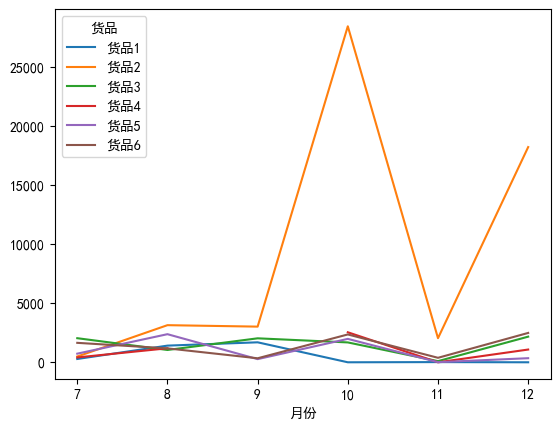

In [77]:
data1 = data.groupby(['月份','货品'])['数量'].sum().unstack()
data1.plot(kind='line')
plt.show()

#货品2在10、12月份销量猛增，猜测原因：1、公司加大销售力度；2、开发了新的市场

In [81]:
#b.不同的区域
data1 =  data.groupby(['销售区域','货品'])['数量'].sum().unstack()
data1
#从销售区域看，每种货品有1-3个销售区域
#货品1：华北、华南、西北
#货品2：华东、马来西亚
#货品3：华北
#货品4：西北
#货品5：泰国
#货品6：马来西亚

货品,货品1,货品2,货品3,货品4,货品5,货品6
销售区域,,,,,,
华东,NaN,53811.0,NaN,NaN,NaN,NaN
华北,2827.0,NaN,9073.5,NaN,NaN,NaN
华南,579.0,NaN,NaN,NaN,NaN,NaN
泰国,NaN,NaN,NaN,NaN,5733.0,NaN
西北,11.0,NaN,NaN,5229.0,NaN,NaN
马来西亚,NaN,1510.0,NaN,NaN,NaN,8401.0


In [89]:
#c.月份和区域  维度
data1 = data.groupby(['月份','销售区域','货品'])['数量'].sum().unstack()
data1['货品2']
#货品2在10，12月份销量猛增，原因主要发生在原有销售区域（华东）
#同样，分析出7、8、9，11月份销售数量还有很大提升空间，可以适当加大营销力度

月份  销售区域
7   华东        489.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        2.0
8   华东       1640.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚     1503.0
9   华东       3019.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        1.0
10  华东      28420.0
    华北          NaN
    泰国          NaN
    西北          NaN
    马来西亚        NaN
11  华东       2041.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        1.0
12  华东      18202.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        3.0
Name: 货品2, dtype: float64

In [136]:
##商品是否存在质量问题
data['货品用户反馈'] = data['货品用户反馈'].str.strip()#去除首尾空格
data1 = data.groupby(['货品','销售区域'])['货品用户反馈'].value_counts().unstack(fill_value=0) 
a = data1.sum(axis=1)
data1['拒货率'] = data1['拒货']/a
data1['返修率'] = data1['返修']/a
data1['合格率'] = data1['质量合格']/a
data_result = data1.sort_values(['合格率','返修率','拒货率'],ascending = False)
data_result
#结果：货品3、6、5合格率较高，返修率较低，说明质量可以
####  货品1、4、2合格率较低，返修率较高，说明质需要提升，需要改善
####  货品2在马来西亚的拒货率最高，结合  按时收货率（极低）， 猜测 马来西亚人对送货的时效性要求较高，如果达不到，则往往拒货
##结合货品2的销售数量，华东区域的销量大于马来西亚，可以考虑增大在华东的投资，适当减小马来西亚的投入

货品用户反馈    拒货  质量合格  返修       拒货率       返修率       合格率
货品  销售区域                                            
货品3 华北    31   188  19  0.130252  0.079832  0.789916
货品6 马来西亚  56   246  14  0.177215  0.044304  0.778481
货品5 泰国    14   144  29  0.074866  0.155080  0.770053
货品2 华东    72   184  51  0.234528  0.166124  0.599349
货品1 华南     5     4   2  0.454545  0.181818  0.363636
    西北     0     1   2  0.000000  0.666667  0.333333
    华北     0     3  12  0.000000  0.800000  0.200000
货品4 西北     0     9  49  0.000000  0.844828  0.155172
货品2 马来西亚   6     1   3  0.600000  0.300000  0.100000

In [ ]:
##总结：：结论： 1、货品4->西北，货品2->马来西亚 两条线路存在较大问题，急需提升 2、货品2->华东市场较大市场空间，适合大投入；
##货品2在西北配送时效长，用户拒收率高，应该减少投入 3、货品1、2、4质量存在问题，建议扩大抽检范围，增大质检力度